In [1]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cmx
# For color mapping
import matplotlib.colors as colors

#directorio="D:\\Para procesar\\Académica\\Ciencias Físicas\\Doctorado\\Materias\\Redes complejas\\Trabajos_prácticos\\Practica_computacional\\"
directorio='G:\\Redes\\'
version=1

In [2]:
def frequency(Lista):
    grupo={}
    for line in range(len(Lista)):
        try:
            b=grupo[Lista[line]]
            b+=1
            grupo.update({Lista[line]:b})
        except:
            grupo[Lista[line]]=1
    return(grupo)

In [48]:
# Cargamos una red previamente guardada en un archivo

N=100000
i=0
G=nx.DiGraph()
archivo = open(directorio+'archivo_red_'+str(version)+'.txt','r',encoding='utf-8')
for line in archivo:
    i+=1
    G.add_edges_from([(line.split()[0],line.split()[1])])
    if i==N:
        break
archivo.close()
print(len(G),i)

107896 100000


In [49]:
# Separamos las componentes conectadas, al costo de volver a una red no dirigida

GG=G.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(G.subgraph(i))

In [50]:
# Se abre el archivo de atributos que necesitamos

archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
N=1000000
fos = {}
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    for tag in range(len(a)):
            try:
                b=fos[a[tag]]
                b+=1
                fos.update({a[tag]:b})
            except:
                fos[a[tag]]=1
    if i==N:
        break
archivo.close()

In [51]:
# Cargamos los atributos a cada uno de los nodos

archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    freq=np.zeros(len(a))
    try:
        for k in range(len(a)):
            freq[k]=fos[a[k]]
        key=a[np.argmax(freq)]    
        G.node[line.split()[0]]['campo']=key
        j+=1
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

In [52]:
def graficar_componente(Componentes,comp,atributo,ancho):
    
    Componente=G.subgraph(Componentes[comp:comp+1][0])
    campos_list=[]
    val_map = {}
    campos_list=[]


    for paper in Componente:
        campos_list.append(Componente.node[paper][atributo])
        val_map.update({paper: Componente.node[paper][atributo]})
    
    grupo={}
    
    x={}
    sorted_by_value = []
    
    if atributo == 'year':
        y={}
        x=frequency(campos_list)
        
        for line in x.keys():
            y[line]=line
        sorted_by_value = sorted(y.items(), key=lambda kv: kv[1],reverse=True)
    else:   
        x=frequency(campos_list)
        sorted_by_value = sorted(x.items(), key=lambda kv: kv[1],reverse=True)
    
    cmap =[]
    cmap = cmx.rainbow(np.linspace(0.0, 1.0, len(sorted_by_value)))
    
    keys={}
    #keys=sorted_by_value
    conversion={}
    for i in range(len(sorted_by_value)):
        conversion.update({sorted_by_value[i][0]: cmap[i]})
   # print(conversion)

    color_map =[]  

    for paper in campos_list:
        color_map.append(conversion[paper])
    #print(campos_list)
    
    options = {
    'node_size': 85,
    'width': 3,
    }
    pos=nx.kamada_kawai_layout(Componente)
    
    # Using a figure to use it as a parameter when calling nx.draw_networkx
    f = plt.figure(1)
    ax = f.add_subplot(1,1,1)
    for label in conversion:
        #pass
        ax.plot([ancho],[1],color=conversion[label],label=label,linestyle='',marker='.')
        ax.legend(loc="lower right", bbox_to_anchor=(0.6,0.5))
    # Just fixed the color map
    nx.draw_networkx(Componente,pos, node_color=color_map,with_labels=False,ax=ax, **options)

    # Setting it to how it was looking before.                                                                                                              
    plt.axis('off')
    f.set_facecolor('w')

    plt.legend(numpoints = 1)

    f.tight_layout()
    plt.show()

In [53]:
archivo = open(directorio+'archivo_venue_'+str(version)+'.txt','r',encoding='utf-8')
i=0
for line in archivo:
    i+=1
    try:
        G.node[line.split()[0]]['venue']=' '.join(line.split()[1:len(line)-1])
        #print(' '.join(line.split()[1:len(line)-1]))
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

In [54]:
archivo = open(directorio+'archivo_year_'+str(version)+'.txt','r',encoding='utf-8')
i=0
for line in archivo:
    i+=1
    try:
        G.node[line.split()[0]]['year']=int(line.split()[1])
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

In [55]:
graficar_componente(Componentes[],3,'year',4)

SyntaxError: invalid syntax (<ipython-input-55-4d042f7cb7d6>, line 1)

In [56]:
def red_year(G):
    G_year={}
    for i in range(1850,2019):
        lista_nodos=[]
        for node in G.nodes:
            try:
                KEY=G.nodes[node]['year']<i+1
                if KEY:
                    lista_nodos.append(node)
            except KeyError:
                pass
        G_year[str(i)]=G.subgraph(lista_nodos)
    return(G_year)

In [65]:
G_year=red_year(Componentes[1])

In [117]:
def graficar_red_lims(G,G_year,atributo,ancho,pos_year,lims):
    
    Componente=G.copy()
    campos_list=[]
    val_map = {}
    val_map_year = {}
    campos_list_year=[]

    ## Generas una lista de atributo de cada nodo
    for paper in Componente:
        campos_list.append(Componente.node[paper][atributo])
        val_map.update({paper: Componente.node[paper][atributo]})

    for paper in G_year:
        campos_list_year.append(G_year.node[paper][atributo])
        val_map_year.update({paper: G_year.node[paper][atributo]})
    
    grupo={}
    
    x={}
    sorted_by_value = []
    
    ## Asignamos los colores para cada valor de atributo, distinguiendo el año de cualquier otro atributo
    if atributo == 'year':
        y={}
        x=frequency(campos_list)
        
        for line in x.keys():
            y[line]=line
        sorted_by_value = sorted(y.items(), key=lambda kv: kv[1],reverse=True)
    else:   
        x=frequency(campos_list)
        sorted_by_value = sorted(x.items(), key=lambda kv: kv[1],reverse=True)
    
    cmap =[]
    cmap = cmx.rainbow(np.linspace(0.0, 1.0, len(sorted_by_value)))
 
    ## A cada valor de atributo se le asigna un determinado color
    conversion={}
    for i in range(len(sorted_by_value)):
        conversion.update({sorted_by_value[i][0]: cmap[i]})
  

    ## Asigna un color a cada uno de los nodos de la red G_year (será el mismo para todos)
    color_map =[]  

    for paper in campos_list_year:
        color_map.append(conversion[paper])
   
    
    options = {
    'node_size': 85,
    'width': .5,
    }
    pos=nx.kamada_kawai_layout(Componente)
    
    # Using a figure to use it as a parameter when calling nx.draw_networkx
    f = plt.figure(1)
    ax = f.add_subplot(1,1,1)
    for label in conversion:
        #pass
        ax.plot([ancho],[1],color=conversion[label],label=label,linestyle='',marker='.')
        ax.legend(loc="lower right", bbox_to_anchor=(0.6,0.5))
    # Just fixed the color map
    nx.draw_networkx(G_year,pos=pos_year, node_color=color_map,with_labels=False,ax=ax, **options)

    # Setting it to how it was looking before.                                                                                                              
    plt.axis('off')
    f.set_facecolor('w')

    plt.legend(numpoints = 1)
    f.tight_layout()
    plt.xlim(lims[0])
    plt.ylim(lims[1])
    plt.show()

In [99]:
def graficar_red(G,G_year,atributo,ancho,pos_year):
    
    Componente=G.copy()
    campos_list=[]
    val_map = {}
    val_map_year = {}
    campos_list_year=[]

    ## Generas una lista de atributo de cada nodo
    for paper in Componente:
        campos_list.append(Componente.node[paper][atributo])
        val_map.update({paper: Componente.node[paper][atributo]})

    for paper in G_year:
        campos_list_year.append(G_year.node[paper][atributo])
        val_map_year.update({paper: G_year.node[paper][atributo]})
    
    grupo={}
    
    x={}
    sorted_by_value = []
    
    ## Asignamos los colores para cada valor de atributo, distinguiendo el año de cualquier otro atributo
    if atributo == 'year':
        y={}
        x=frequency(campos_list)
        
        for line in x.keys():
            y[line]=line
        sorted_by_value = sorted(y.items(), key=lambda kv: kv[1],reverse=True)
    else:   
        x=frequency(campos_list)
        sorted_by_value = sorted(x.items(), key=lambda kv: kv[1],reverse=True)
    
    cmap =[]
    cmap = cmx.rainbow(np.linspace(0.0, 1.0, len(sorted_by_value)))
 
    ## A cada valor de atributo se le asigna un determinado color
    conversion={}
    for i in range(len(sorted_by_value)):
        conversion.update({sorted_by_value[i][0]: cmap[i]})
  

    ## Asigna un color a cada uno de los nodos de la red G_year (será el mismo para todos)
    color_map =[]  

    for paper in campos_list_year:
        color_map.append(conversion[paper])
   
    
    options = {
    'node_size': 85,
    'width': .5,
    }
    pos=nx.kamada_kawai_layout(Componente)
    
    # Using a figure to use it as a parameter when calling nx.draw_networkx
    f = plt.figure(1)
    ax = f.add_subplot(1,1,1)
    for label in conversion:
        pass
#         ax.plot([ancho],[1],color=conversion[label],label=label,linestyle='',marker='.')
#         ax.legend(loc="lower right", bbox_to_anchor=(0.6,0.5))
    # Just fixed the color map
    nx.draw_networkx(G_year,pos=pos_year, node_color=color_map,with_labels=False,ax=ax, **options)

    # Setting it to how it was looking before.                                                                                                              
    plt.axis('off')
    f.set_facecolor('w')

    plt.legend(numpoints = 1)
    ylim=ax.get_ylim()
    xlim=ax.get_xlim()
    f.tight_layout()
    plt.show()
    return([xlim,ylim])

In [68]:
pos2 = nx.layout.kamada_kawai_layout(Componentes[1])

No handles with labels found to put in legend.


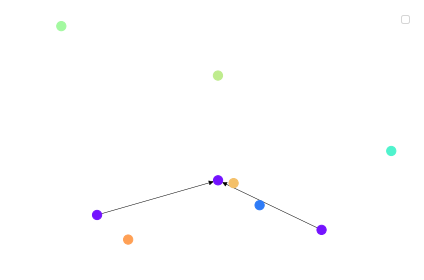

No handles with labels found to put in legend.


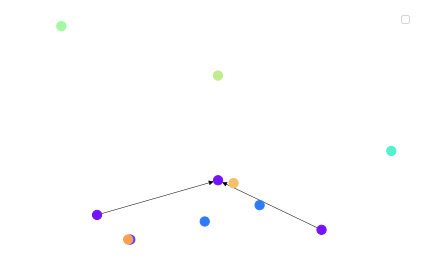

No handles with labels found to put in legend.


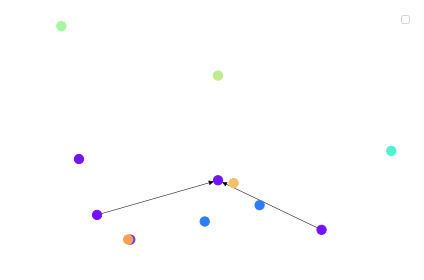

No handles with labels found to put in legend.


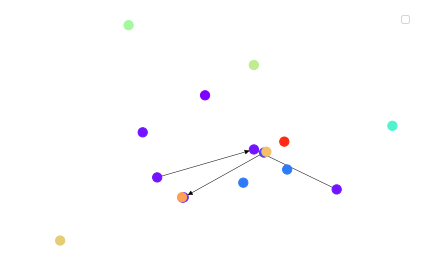

No handles with labels found to put in legend.


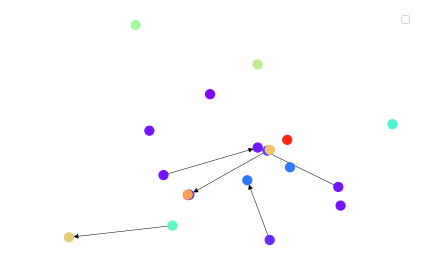

No handles with labels found to put in legend.


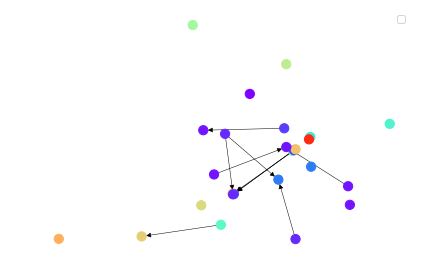

No handles with labels found to put in legend.


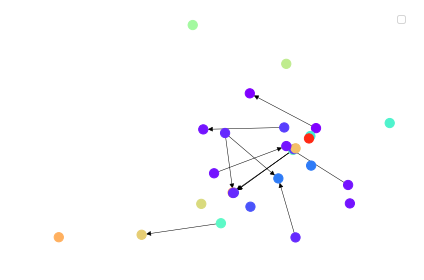

No handles with labels found to put in legend.


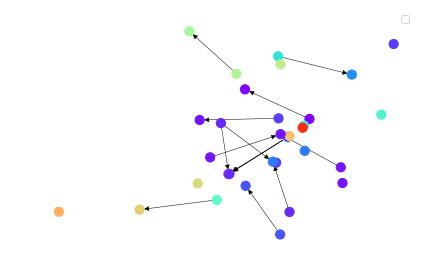

No handles with labels found to put in legend.


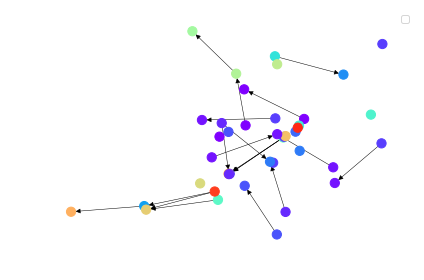

No handles with labels found to put in legend.


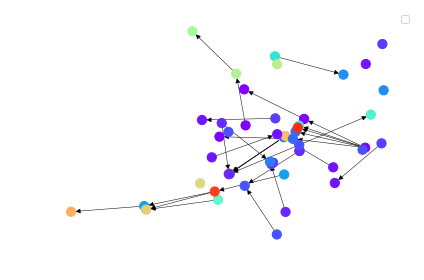

No handles with labels found to put in legend.


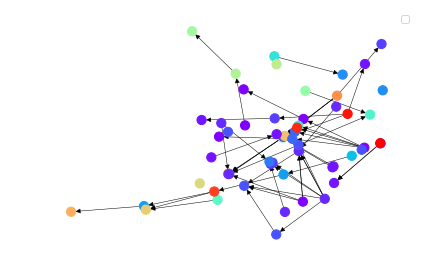

No handles with labels found to put in legend.


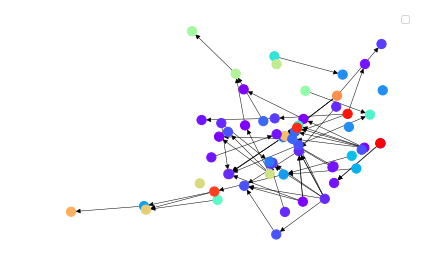

No handles with labels found to put in legend.


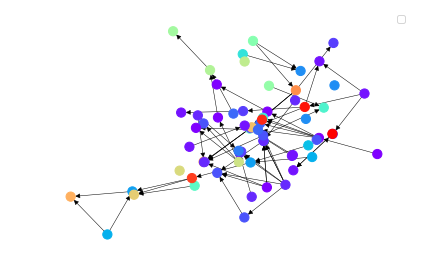

No handles with labels found to put in legend.


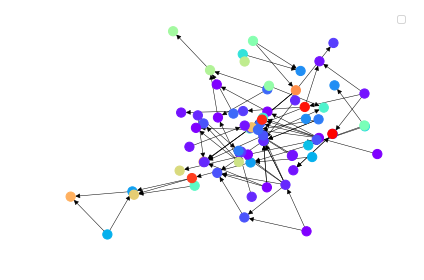

No handles with labels found to put in legend.


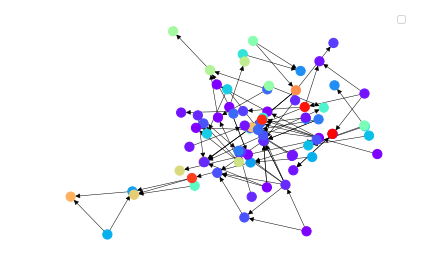

No handles with labels found to put in legend.


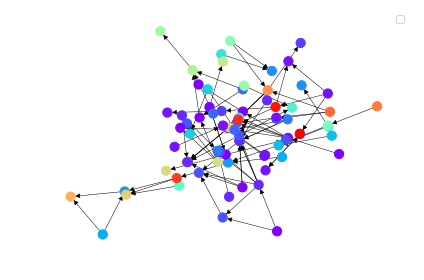

No handles with labels found to put in legend.


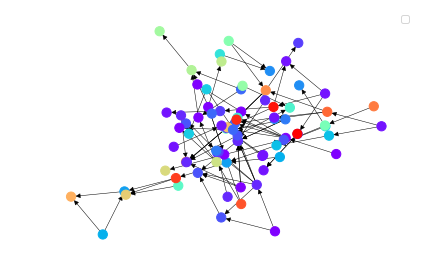

No handles with labels found to put in legend.


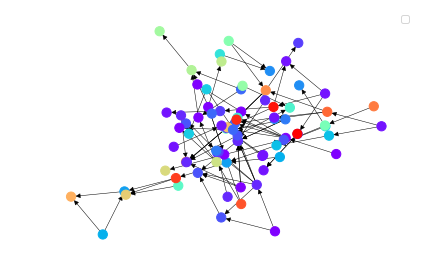

In [113]:
for i in range(2000,2018):
    y=graficar_red(Componentes[1],G_year[str(i)],'venue',4,pos2)

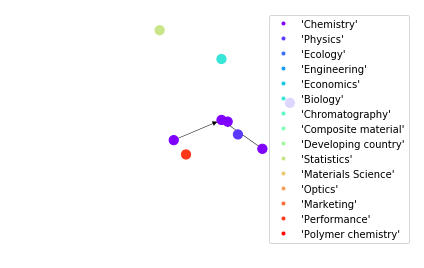

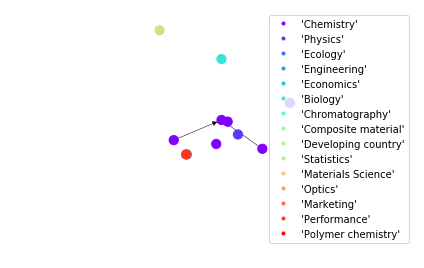

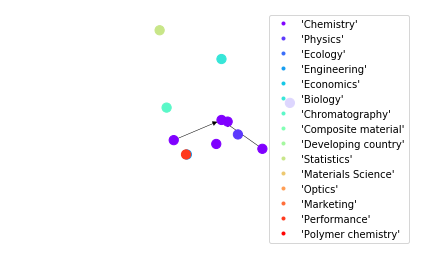

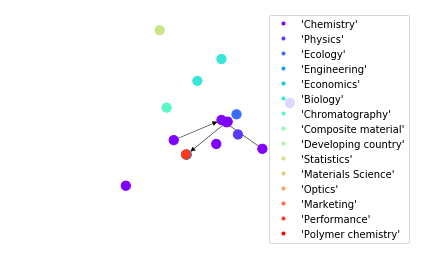

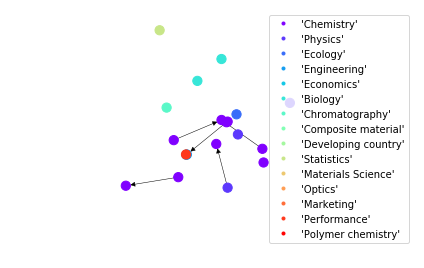

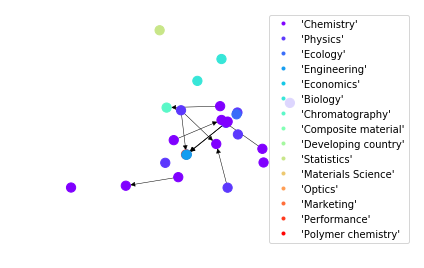

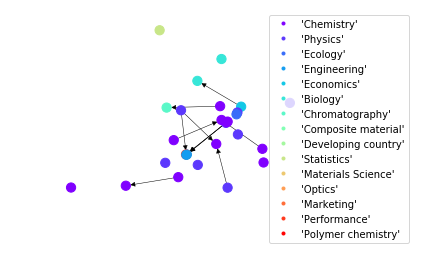

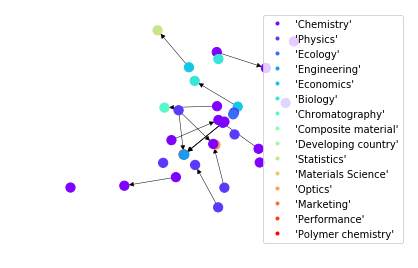

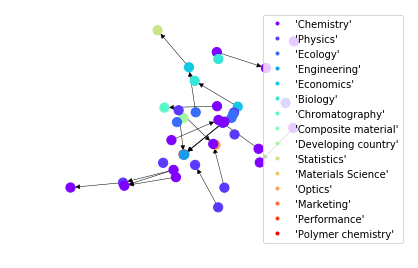

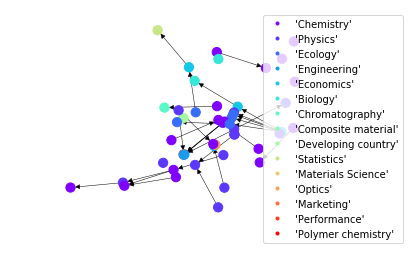

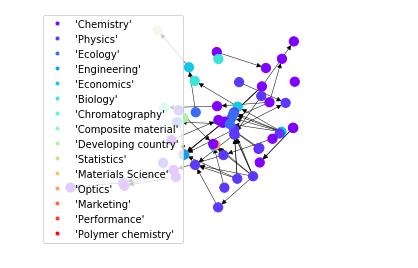

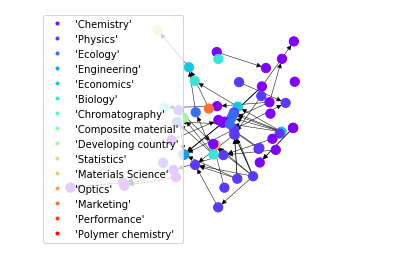

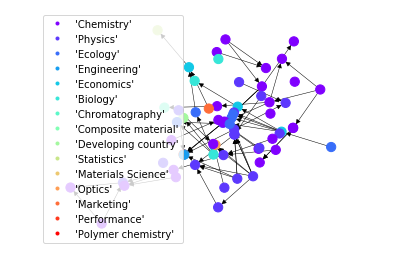

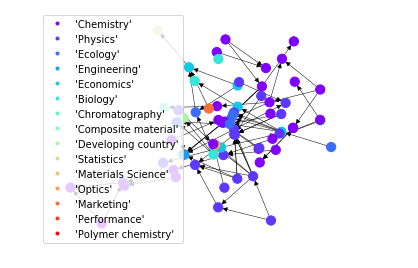

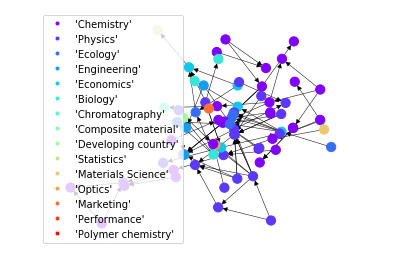

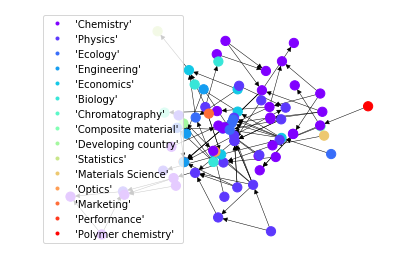

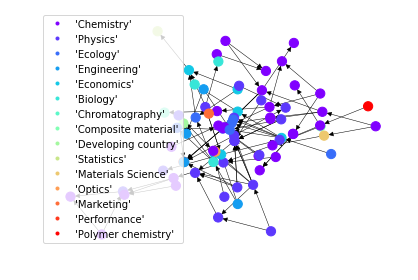

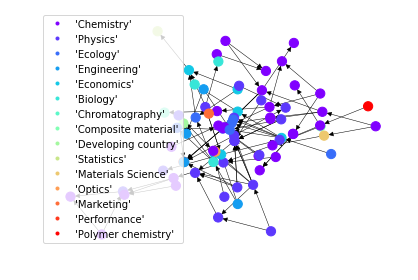

In [118]:
for i in range(2000,2018):
    graficar_red_lims(Componentes[1],G_year[str(i)],'campo',4,pos2,y)